# Containers, zoeken, sorteren

In deze notebook behandelen we:
- Het maken van een eigen stack klasse.
- Het implementeren en vergelijken van verschillende varianten van QuickSort.
- Implementere en vergelijken van een Priority Queue.

Welkom terug! Ik hoop dat jullie de eerste notebook goed door zijn
gekomen en weer zin hebben in de 2e ~. 

Laten we eerst weer eens even beginnen met het doen van de nodige imports: 

In [1]:
import sys
import time
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt

# Controleer de Python- en IPython-versie met asserts
# Asserts zijn handig: ingebouwde unit-testjes in Python!
assert sys.version_info.major == 3 and sys.version_info.minor >= 12, "Je hebt minimaal Python 3.12 nodig."
print(f"Python versie {'.'.join(map(str, sys.version_info[:3]))} is oke!")

import IPython
assert IPython.version_info[0] >= 7, "Je hebt IPython >= 7 nodig."
print(f"IPython versie {'.'.join(map(str, IPython.version_info[:3]))} is ook oke!")

print("Python en IPython lijken in orde.")

Python versie 3.12.3 is oke!
IPython versie 9.2.0 is ook oke!
Python en IPython lijken in orde.


## Opgave 1: Een eigen Stack (een plek op silicium)

Schrijf een eigen Stack-klasse op basis van een numpy array, waar alleen integers in mogen. Je mag zelf kiezen welk soort integers want in numpy mag je kiezen hoe groot de ints mogen zijn en of ze signed of unsigned moeten zijn. Je kan hiervoor dtype gebruiken bij het aanmaken van de array, bijvoorbeeld: dtype='int16' levert 16bit signed integers op. 

De Stack heeft een fixed capacity (de grootte van de array). Implementeer een klasse MyStack, waar in ieder geval de volgende functies in verwerkt zijn. Zet bij elke functie van de klasse een runtime-complexity analyse (dus de complexiteit middels de big-O notatie, en een korte uitleg daarvan).

- push(int) (Zet een item op "kop" van de lijst - je mag zelf kiezen hoe de Stack groeit, return een boolean die zegt of het pushen gelukt it. Pushen lukt namelijk niet als de maximale capaciteit bereikt is.)
- pop() (Return en verwijder het element dat nu op kop van de Stack staat) 
- peek() (Return het element op kop van de Stack, maar verwijder hem niet) 
- isEmpty() (Return of de Stack nu leeg is, d.w.z., er nu geen elementen in staan)
- isFull() (Return of the maxCapacity bereikt is)

Daarna willen we graag de capaciteit kunnen vergroten. Voeg een functie toe 
- doubleCapacity() (Verdubbel de capaciteit van de Stack. Zorg ervoor dat de volgorde van de elementen op de Stack in tact blijft.) Wat is de runtime complexity (big-O) van deze functie? Leg dit uit in het commentaar.

Bedenk goede unit tests om de werking van de Stack te testen.
Gebruik hiervoor het Python-commando "assert" (voor een voorbeeld,
zie vorige tutorial). 

In [ ]:
class myStack:
    """
    Class to make a stack

    EXAMPLE
    --------
    >>> stack = mystack(42)
    """

    # Deze methode heeft een runtime van O(1), omdat we maar 1 array aanamaken met vaste grootte.
    def __init__(self, max_capacity):
        """
        Constructor for Class myStack

        PARAMETERS
        ------------
        self	:	self
        max_capacity: the maximimum number of elements allowed on the stack.

        EXAMPLE
        --------
        >>> stack = mystack(42)
        """
        
        self.capacity = max_capacity
        self.array = np.zeros(max_capacity, dtype=int)
        self.top = 0 # wijzen naar de eerste vrije plek in de stack

    def push(self, int):
        """
        Push an integer on the stack

        PARAMETERS
        ------------
        self	:	self
        int		:	the integer to be pushed on the stack.

        EXAMPLE
        --------
        >>> stack.push(42)
        """
        
        if self.isFull():
            print("Stack is full, cannot push.")
            return False
        self.array[self.top] = int
        self.top += 1
        print(f"Pushed {int} onto the stack.")
        return True
    
         
    def pop(self):
        """
        Pop an integer from the stack

        PARAMETERS
        ------------
        self	:	self

        EXAMPLE
        --------
        >>> stack.pop()
        """
        
        if self.is_empty():
            print("Stack is empty, cannot pop.")
            return False
        
        self.top -= 1
        print(f"Popped {self.array[self.top]} from the stack.")
        return self.array[self.top]
    
    def peek(self):
        """
        Peek the top element of the stack

        PARAMETERS
        ------------
        self	:	self

        EXAMPLE
        --------
        >>> stack.peek()
        """
        if self.is_empty():
            print("Stack is empty, cannot peek.")
            return False
        print(f"Top element is {self.array[self.top - 1]}.")
        return self.array[self.top - 1]
    

        
    def is_empty(self):
        """
        Check if the stack is empty

        PARAMETERS
        ------------
        self	:	self

        EXAMPLE
        --------
        >>> stack.is_empty()
        """
        
        return self.top == 0
    
    def isFull(self):
        """
        Check if the stack is full

        PARAMETERS
        ------------
        self	:	self

        EXAMPLE
        --------
        >>> stack.isFull()
        """
        
        return self.top == self.capacity
    
    # Deze methode heeft een runtime van O(n)
    # omdat elk bestaand element eenmalig gekopieerd moet worden.
    
    def doubleCapacity(self):
        """
        Double the capacity of the stack

        PARAMETERS
        ------------
        self	:	self

        EXAMPLE
        --------
        >>> stack.doubleCapacity()
        """
    
        new_capacity = self.capacity * 2
        new_array = np.zeros(new_capacity, dtype=self.array.dtype)
        new_array[:self.top] = self.array[:self.top] #kopieer bestaande elementen
        self.array = new_array
        self.capacity = new_capacity
        print(f"Stack capacity doubled to {self.capacity}.")
    
    
if __name__ == "__main__":
    stack = myStack(3)

    # Test leegte
    assert stack.is_empty() == True
    assert stack.isFull() == False

    # Push elementen
    assert stack.push(10) == True
    assert stack.push(20) == True
    assert stack.push(30) == True

    # Stack is nu vol
    assert stack.isFull() == True
    #assert stack.push(40) == False  # moet mislukken

    # Peek
    assert stack.peek() == 30  # laatste ingevoerde item

    # Pop
    assert stack.pop() == 30
    assert stack.pop() == 20
    assert stack.pop() == 10
    try:
        assert stack.pop() == None  # stack is leeg
    except Exception as e:
        print("Stack is empty, cannot pop.")
        
    # Test doubleCapacity
    assert stack.push(1)
    assert stack.push(2)
    assert stack.push(3)
    stack.doubleCapacity()
    assert stack.capacity == 6
    assert stack.push(4)
    assert stack.push(5)
    assert stack.push(6)
    assert stack.isFull() == True

    print("✅ Alle tests geslaagd!")

    
    
    


Pushed 10 onto the stack.
Pushed 20 onto the stack.
Pushed 30 onto the stack.
Top element is 30.
Popped 30 from the stack.
Popped 20 from the stack.
Popped 10 from the stack.
Stack is empty, cannot pop.
Stack is empty, cannot pop.
Pushed 1 onto the stack.
Pushed 2 onto the stack.
Pushed 3 onto the stack.
Stack capacity doubled to 6.
Pushed 4 onto the stack.
Pushed 5 onto the stack.
Pushed 6 onto the stack.
✅ Alle tests geslaagd!


---

## Opgave 2: Quick-sort en meer Quick-sort

De runtime van Quick-sort is erg afhankelijk van de keuze van de pivot. We gaan in deze opgave hiervoor verschillende alternatieven bekijken en vergelijken om te zien wat daar het effect van is; zowel theoretisch (in termen van de big-O) als in de praktijk (door runtime te meten). 

* Schrijf een functie voor het sorteren van een numpy array met Quicksort. (Zie Algoritmes 16 en 17 van hoofdstuk 7.3 in de reader)
* Pas de functie zo aan dat het aantal keer dat twee waardes vergeleken worden ook wordt gereturnt (naast de gesorteerde lijst). (NB: in Python kan je meerdere dingen tegelijk teruggeven bij een functie.) 
* Schrijf een test-functie, waarbij de gemiddelde waarde van het (bovenstaande) aantal vergelijkingen wordt geschat, door het algoritme X keer voor verschillende random lijsten van lengte L te runnen. Geef naast dit gemiddelde ook de standaardafwijking (standard deviation) terug.  
* Schrijf nu een tweede versie van quick-sort, maar nu zo dat de pivot anders wordt gekozen. Namelijk, neem de minimale waarde van tussen (en inclusief) $lo$ en $hi$ (in de array $a$) als de pivot. Geef wederom het aantal vergelijkingen terug. 
* Vergelijk de twee versies van quicksort voor verschillende groottes van arrays, en plot de resultaten middels matplotlib.pyplot (zoals we ook in de vorige tutorial hadden gedaan), vergeet niet de standaardafwijking mee te plotten als een error region. 
* Wat valt je op in de resultaten? Was dit wat je verwachtte? Verklaar je antwoord met een verwijzing naar de time complexity (big-O) van QuickSort. 
* Laten we nog eens iets anders proberen voor de pivot. Schrijf nog een alternatieve versie van quicksort die op regel 1 in plaats van een random pivot of de minimumwaarde, nu de **mediaan** van de elementen tussen $lo$ and $hi$ (uit $a$) pakt. Voor de mediaan pakken we de middelste waarde. Bijvoorbeeld, de mediaan van {1, 7, 3, 8, 3, 9, 6} is 6. In Python 3 is dit geïmplementeerd met de standaardfunctie **median()** in de **statistics** module. 
* Vergelijk deze nieuwe versie door middel van je testfunctie voor verschillende groottes van inputlijsten, en voeg de resultaten toe aan je plot. 
* Schrijf nu een nieuwe testfunctie die de resultaten in termen van runtime vergelijkt in plaats van het aantal vergelijkingen, en plot de resultaten voor de drie alternatieve quick-sorts. 
* Licht de resultaten toe, en verklaar de verschillen?
* Wat het een goed idee om de mediaan te pakken als pivot? Waarom wel/niet? (Gebruik de time complexity in termen van big-O om hier antwoord op te geven.) 


Standaard pivot: gemiddeld 253.39 vergelijkingen, std: 25.58
Minimum pivot: gemiddeld 1200.49 vergelijkingen, std: 27.18
Mediaan pivot: gemiddeld 193.12 vergelijkingen, std: 0.43


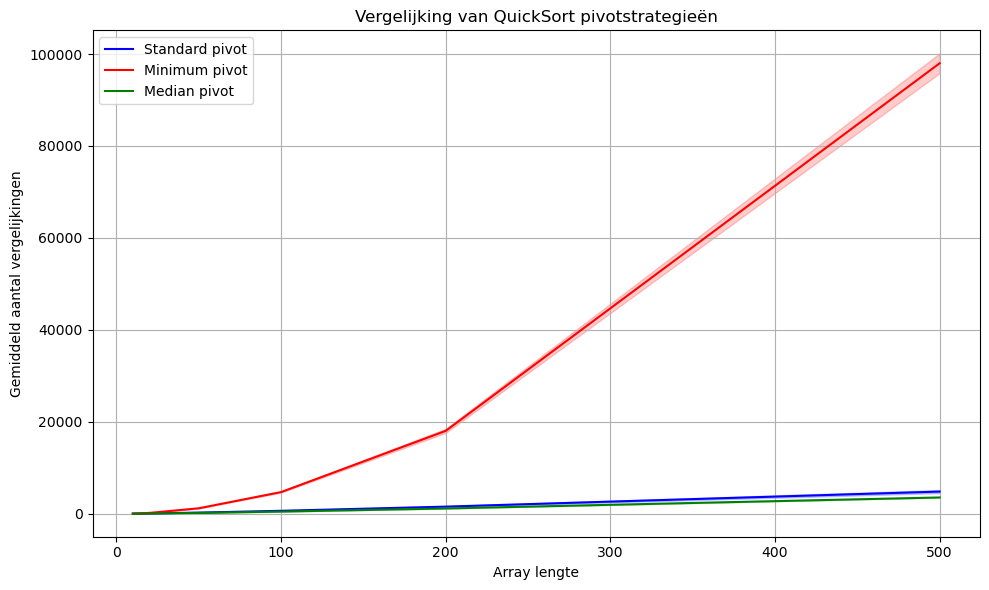

In [29]:
import matplotlib.pyplot as plt
import statistics
import numpy as np

def partition_standard(a, lo, hi):
    pivot = a[hi]
    i = lo
    comparisons = 0

    for j in range(lo, hi):
        comparisons += 1
        if a[j] <= pivot:
            a[i], a[j] = a[j], a[i]
            i += 1

    a[i], a[hi] = a[hi], a[i]
    return i, comparisons


def quicksort_standard(arr):
    arr_copy = np.copy(arr)
    total_cmp = _quicksort_recursive(arr_copy, 0, len(arr_copy) - 1, partition_standard)
    return arr_copy, total_cmp



def _quicksort_recursive(a, lo, hi, partition_fn):
    if lo >= hi:
        return 0

    p, cmp_here = partition_fn(a, lo, hi)
    cmp_left = _quicksort_recursive(a, lo, p - 1, partition_fn)
    cmp_right = _quicksort_recursive(a, p + 1, hi, partition_fn)

    return cmp_here + cmp_left + cmp_right



def partition_minpivot(a, lo, hi):
    min_index = lo + np.argmin(a[lo:hi+1])  # index van minimum
    a[min_index], a[hi] = a[hi], a[min_index]  # zet minimum op eind

    return partition_standard(a, lo, hi)

def quicksort_minpivot(arr):
    arr_copy = np.copy(arr)
    total_cmp = _quicksort_recursive(arr_copy, 0, len(arr_copy) - 1, partition_minpivot)
    return arr_copy, total_cmp

def test_quicksort_variant(quicksort_fn, num_trials, length):
    comparisons_list = []

    for _ in range(num_trials):
        arr = np.random.randint(0, 1000, size=length)
        _, comparisons = quicksort_fn(arr)
        comparisons_list.append(comparisons)

    return statistics.mean(comparisons_list), statistics.stdev(comparisons_list)

mean_std, std_std = test_quicksort_variant(quicksort_standard, 100, 50)
mean_min, std_min = test_quicksort_variant(quicksort_minpivot, 100, 50)

print(f"Standaard pivot: gemiddeld {mean_std:.2f} vergelijkingen, std: {std_std:.2f}")
print(f"Minimum pivot: gemiddeld {mean_min:.2f} vergelijkingen, std: {std_min:.2f}")

def partition_medianpivot(a, lo, hi):
    slice_copy = a[lo:hi+1].copy()
    slice_copy.sort()
    median_value = slice_copy[len(slice_copy) // 2] 
    for k in range(lo, hi+1):
        if a[k] == median_value:
            median_index = k
            break

    a[median_index], a[hi] = a[hi], a[median_index]

    return partition_standard(a, lo, hi)


def quicksort_medianpivot(arr):
    arr_copy = np.copy(arr)
    total_cmp = _quicksort_recursive(arr_copy, 0, len(arr_copy) - 1, partition_medianpivot)
    return arr_copy, total_cmp

mean_med, std_med = test_quicksort_variant(quicksort_medianpivot, 100, 50)
print(f"Mediaan pivot: gemiddeld {mean_med:.2f} vergelijkingen, std: {std_med:.2f}")

def plot_comparisons(lengths=[10, 20, 50, 100, 200,500], num_trials=100):
    means_std, stds_std = [], []
    means_min, stds_min = [], []
    means_med, stds_med = [], []

    for L in lengths:
        m_std, s_std = test_quicksort_variant(quicksort_standard, num_trials, L)
        m_min, s_min = test_quicksort_variant(quicksort_minpivot, num_trials, L)
        m_med, s_med = test_quicksort_variant(quicksort_medianpivot, num_trials, L)

        means_std.append(m_std)
        stds_std.append(s_std)
        means_min.append(m_min)
        stds_min.append(s_min)
        means_med.append(m_med)
        stds_med.append(s_med)

    # Plot
    plt.figure(figsize=(10, 6))

    x = lengths

    plt.plot(x, means_std, label="Standard pivot", color="blue")
    plt.fill_between(x, np.array(means_std) - np.array(stds_std), 
                        np.array(means_std) + np.array(stds_std), alpha=0.2, color="blue")

    plt.plot(x, means_min, label="Minimum pivot", color="red")
    plt.fill_between(x, np.array(means_min) - np.array(stds_min), 
                        np.array(means_min) + np.array(stds_min), alpha=0.2, color="red")

    plt.plot(x, means_med, label="Median pivot", color="green")
    plt.fill_between(x, np.array(means_med) - np.array(stds_med), 
                        np.array(means_med) + np.array(stds_med), alpha=0.2, color="green")

    plt.xlabel("Array lengte")
    plt.ylabel("Gemiddeld aantal vergelijkingen")
    plt.title("Vergelijking van QuickSort pivotstrategieën")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_comparisons()



Uit de grafiek blijkt dat er wel een verschil is in de verschillende pivots. Hoewel Standard pivot en median pivot niet veel van elkaar verschilllen , zit Minimum pivot er wel duidelijk boven. Deze voert teveel vergelijkingen op omdat de lijst heel scheef wordt door de minimum pivot. Bij een median pivotkan er er op vertrouwen dat het altijd O(n log n) is omdat je altijd het gemiddelde pakt en daarom dus minder vergelijkingen nodig bent.

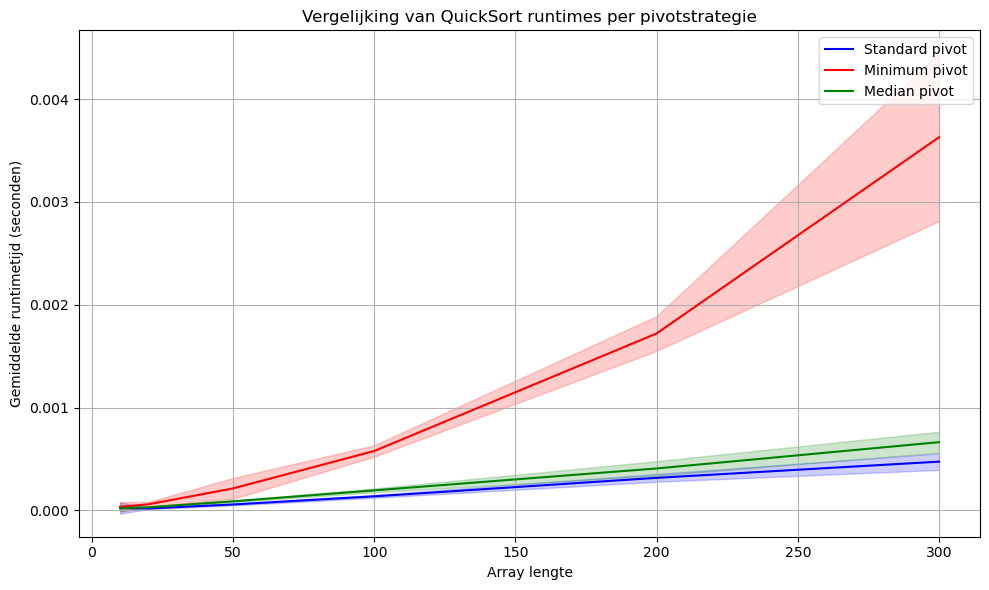

In [30]:
import time
def test_runtime_variant(quicksort_fn, num_trials, length):
    runtimes = []

    for _ in range(num_trials):
        arr = np.random.randint(0, 1000, size=length)
        start = time.perf_counter()
        quicksort_fn(arr)
        end = time.perf_counter()
        runtimes.append(end - start)

    return statistics.mean(runtimes), statistics.stdev(runtimes)

def plot_runtime_comparisons(lengths=[10, 20, 50, 100, 200, 300], num_trials=100):
    mean_std, std_std = [], []
    mean_min, std_min = [], []
    mean_med, std_med = [], []

    for L in lengths:
        m_std, s_std = test_runtime_variant(quicksort_standard, num_trials, L)
        m_min, s_min = test_runtime_variant(quicksort_minpivot, num_trials, L)
        m_med, s_med = test_runtime_variant(quicksort_medianpivot, num_trials, L)

        mean_std.append(m_std)
        std_std.append(s_std)
        mean_min.append(m_min)
        std_min.append(s_min)
        mean_med.append(m_med)
        std_med.append(s_med)

    x = lengths
    plt.figure(figsize=(10, 6))

    plt.plot(x, mean_std, label="Standard pivot", color="blue")
    plt.fill_between(x, np.array(mean_std) - np.array(std_std),
                        np.array(mean_std) + np.array(std_std), alpha=0.2, color="blue")

    plt.plot(x, mean_min, label="Minimum pivot", color="red")
    plt.fill_between(x, np.array(mean_min) - np.array(std_min),
                        np.array(mean_min) + np.array(std_min), alpha=0.2, color="red")

    plt.plot(x, mean_med, label="Median pivot", color="green")
    plt.fill_between(x, np.array(mean_med) - np.array(std_med),
                        np.array(mean_med) + np.array(std_med), alpha=0.2, color="green")

    plt.xlabel("Array lengte")
    plt.ylabel("Gemiddelde runtimetijd (seconden)")
    plt.title("Vergelijking van QuickSort runtimes per pivotstrategie")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

plot_runtime_comparisons()



Hieruit blijkt dat de standard toch efficienter is qua tijd dan de median. Dit komt omdat het mediaan berekend moet worden ,en dit tijd kost. Als je dus de snelste keuze zou willen moet je de standard pivot pakken.


---

## Opgave 3: Priority Queue (waarin we zelf een datastructuur gaan kiezen om een andere datastructuur bovenop te bouwen)

Voor deze opgave heb je minstens een partner nodig. Iedereen
mag je partner zijn 🌈, zolang ze maar een andere datastructuur
implementeren. Dit is van belang, anders valt er weinig te
vergelijken.

PriorityQueues zijn een datastructuur met de volgende eigenschappen: 
* Het is een wachtrij, waarbij elk element een *prioriteit* toegekend krijgt. Deze prioriteit is meestal een integer, (maar soms kan het ook een float zijn).
* Bij gelijke *prioriteit* (dus bijvoorbeeld, alle elementen in de rij hebben prioriteit *1*) gedraagt een priority queue zich net zoals een queue; first in first out (FIFO)
* Echter, als er een element met een hogere prioriteit wordt toegevoegd gaat deze eerst.

Priority Queues worden veel gebruikt bij dingen als task-scheduling binnen applicaties, het OS, of de cloud (https://www.researchgate.net/publication/257726215_A_Priority_Based_Job_Scheduling_Algorithm_in_Cloud_Computing), wachtrijen voor verzenden (telefoongespreken zijn belangrijker dan e-mails want ze moeten real-time) (https://patentimages.storage.googleapis.com/72/1a/c2/7cd0205566e125/US7310670.pdf), maar ook bijvoorbeeld binnen zelf-lerende systemen door te kijken naar welke "ervaringen" de meeste leeropbrengst zouden opleveren (en die dan eerst verwerken) zodat het systeem sneller leert (https://link.springer.com/content/pdf/10.1007/BF00993104.pdf). 

In deze opgave gaan we kijken naar hoe we een priority kunnen bouwen, bovenop eenvoudigere datastructuren. De datastructuur onliggend aan een PriorityQueue zouden we namelijk wel eens anders moeten kunnen willen kiezen dan een gewone queue: het inserten van nieuwe elementen (die nu midden in de queue zouden kunnen komen) is namelijk een stuk lastiger (we zouden makkelijk elementen moeten kunnen toevoegen in het midden van de priority queue).

Enkele tips hierbij: kijk alvast eens naar recursieve datastructuren (volgend college) zoals de doubly linked list. Of verzin zelf een slimme list om priorities er goed in te krijgen. (Je zou bijvoorbeeld voordeel kunnen hebben als je van te voren al weet dat er bijvoorbeeld tien mogelijke prioriteiten zijn - als je zo'n aanname wilt maken, geef dit dan duidelijk aan in het commentaar.) Als je helemaal los wilt gaan, kijk dan eens naar de heap datastructuur (ook wel een heap-boom, https://en.wikipedia.org/wiki/Heap_(data_structure) , NB: dit is niet hetzelfde als de "heap" als rereserveerde geheugenruimte op een chip; daar wordt ongelukkigerwijs helaas dezelfde naam voor gebruikt, maar is iets compleet anders.)

* Onderzoek samen met je practicumpartner mogelijke keuzes voor de onderliggende datastructuur voor een priority queue, en spreek af wie welke gaat doen. (Twee verschillenden)
* Leg voor de keuze die jij zelf gaat implementeren waarom jullie deze gekozen hebben. 
* Implementeer de priority queue met de gekozen datastructuur, en daarbij de volgende functies: 
    * **queue(v, p)** adds value $v$ with priority $p$ to the queue.
    * **dequeue()** returns the value with the highest priority and removes the element from the queue.
    * **contains(v)** returns `True` if and only if the queue contains value $v$.
    * **remove(e)** removes all elements with value $v$ from the queue.
* Analyseer de time complexity van deze priority queue functies zoals je ze hebt geïmplementeerd. Zet je analyse in het commentaar bij de code (zowel de argumentatie als het big-O resultaat).
* Schrijf een testfunctie voor alle bovenstaande functies om de runtime te meten bij het inserten (queue) van X random waardes met random prioriteiten, het dequeuen van al deze X waarden, het vinden (contains) van Y random waarden (uiteraard kleiner dan X, en te testen vóór alles gedequeued is), en het removen van Z waarden (wederom kleiner dan X en het best los te testen onafhankelijk van de andere functies). 
* Neem nu de implementatie over van je practicumpartner in een aparte cell, en maak daaronder een runtimevergelijking voor alle vier de functies. Plot de resultaten met matplotlib.pyplot, met zowel de gemiddelden als de standaardafwijken (als error regions), zoals we gewend zijn van de eerste tutorial. 
* Welke verschillen zie je in de plotjes? Kan je dit verklaren? Zijn er bijvoorbeeld verschillen qua time complexity?

Ik vond het interresant om een binary heap te gebruiken. ik heb deze (guide)[https://bradfieldcs.com/algos/trees/priority-queues-with-binary-heaps/] gebruikt . en vervolgende de queue.p-riorityquerue gebruikt om de plot te vergelijken : 


In [64]:
class PQ_Heap:
    def __init__(self):
        self.heap = []

    def queue(self, value, priority):
        self.heap.append((priority, value))
        self._heapify_up(len(self.heap) - 1)

    def _heapify_up(self, index):
        parent = (index - 1) // 2
        if parent >= 0 and self.heap[index][0] > self.heap[parent][0]:
            self.heap[index], self.heap[parent] = self.heap[parent], self.heap[index]
            self._heapify_up(parent)

    def dequeue(self):
        """
        Verwijder en retourneer het element met de hoogste prioriteit.
        Tijdcomplexiteit: O(log n)
        """
        if not self.heap:
            return None

        if len(self.heap) == 1:
            return self.heap.pop()[1]

        top_value = self.heap[0][1]
        self.heap[0] = self.heap.pop()  # laatste naar boven
        self._heapify_down(0)
        return top_value

    def _heapify_down(self, index):
        largest = index
        left = 2 * index + 1
        right = 2 * index + 2

        # vergelijk linker kind
        if left < len(self.heap) and self.heap[left][0] > self.heap[largest][0]:
            largest = left

        # vergelijk rechter kind
        if right < len(self.heap) and self.heap[right][0] > self.heap[largest][0]:
            largest = right

        # indien nodig, wissel en ga door
        if largest != index:
            self.heap[index], self.heap[largest] = self.heap[largest], self.heap[index]
            self._heapify_down(largest)
            
    def contains(self, value):
        return any(v == value for _, v in self.heap)
    
    def remove(self, value):
        self.heap = [item for item in self.heap if item[1] != value]
        self._rebuild_heap()

    def _rebuild_heap(self):
        # Heap opnieuw opbouwen (bottom-up heapify)
        for i in reversed(range(len(self.heap) // 2)):
            self._heapify_down(i)

pq = PQ_Heap()
pq.queue("taak1", 3)
pq.queue("taak2", 5)
pq.queue("taak3", 1)
print(pq.heap)  # hoogste prio moet bovenaan staan



print(pq.dequeue())  # taal 2
print(pq.dequeue())  # taak 1



print(pq.contains("taak1"))  # False
print(pq.contains("taak3"))  # True

print(pq.queue("taak1", 2))  # opnieuw toevoegen
print(pq.queue("taak4", 4))  # opnieuw toevoegen

print(pq.remove("taak1"))  # verwijderen
print(pq.contains("taak1"))  # False
print(pq.heap)

[(5, 'taak2'), (3, 'taak1'), (1, 'taak3')]
taak2
taak1
False
True
None
None
None
False
[(4, 'taak4'), (1, 'taak3')]


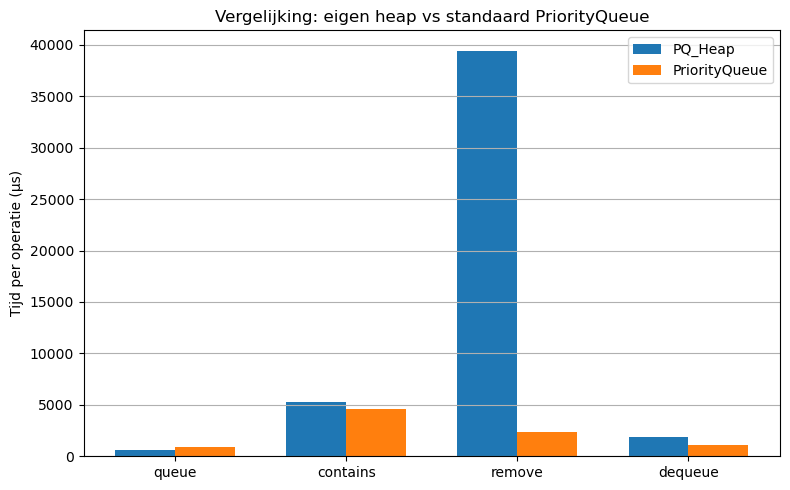

In [ ]:
## Geschreven door chatgpt


def pq_heap_runtime(X=1000, Y=200, Z=200):
    pq = PQ_Heap()
    values = [f"val_{i}" for i in range(X)]
    priorities = [random.randint(1, 10) for _ in range(X)]
    to_check = random.sample(values, Y)
    to_remove = random.sample(values, Z)

    start = time.perf_counter()
    for v, p in zip(values, priorities):
        pq.queue(v, p)
    t_queue = time.perf_counter() - start

    start = time.perf_counter()
    for v in to_check:
        pq.contains(v)
    t_contains = time.perf_counter() - start

    start = time.perf_counter()
    for v in to_remove:
        pq.remove(v)
    t_remove = time.perf_counter() - start

    start = time.perf_counter()
    for _ in range(X):
        pq.dequeue()
    t_dequeue = time.perf_counter() - start

    return {
        "queue": t_queue * 1e6,
        "contains": t_contains * 1e6,
        "remove": t_remove * 1e6,
        "dequeue": t_dequeue * 1e6
    }

from queue import PriorityQueue

def stdlib_priorityqueue(X=1000, Y=200, Z=200):
    pq = PriorityQueue()
    values = [f"val_{i}" for i in range(X)]
    priorities = [random.randint(1, 10) for _ in range(X)]
    to_check = random.sample(values, Y)
    to_remove = random.sample(values, Z)

    start = time.perf_counter()
    for v, p in zip(values, priorities):
        pq.put((-p, v))
    t_queue = time.perf_counter() - start

    heap_list = list(pq.queue)

    start = time.perf_counter()
    for v in to_check:
        any(item[1] == v for item in heap_list)
    t_contains = time.perf_counter() - start

    start = time.perf_counter()
    new_list = [item for item in heap_list if item[1] not in to_remove]
    pq = PriorityQueue()
    for item in new_list:
        pq.put(item)
    t_remove = time.perf_counter() - start

    start = time.perf_counter()
    for _ in range(X - Z):
        if not pq.empty():
            pq.get()
    t_dequeue = time.perf_counter() - start

    return {
        "queue": t_queue * 1e6,
        "contains": t_contains * 1e6,
        "remove": t_remove * 1e6,
        "dequeue": t_dequeue * 1e6
    }


def plot_heap_vs_stdlib(heap_data, stdlib_data):
    labels = list(heap_data.keys())
    x = range(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar([i - width/2 for i in x], [heap_data[k] for k in labels], width, label='PQ_Heap')
    ax.bar([i + width/2 for i in x], [stdlib_data[k] for k in labels], width, label='PriorityQueue')

    ax.set_ylabel("Tijd per operatie (μs)")
    ax.set_title("Vergelijking: eigen heap vs standaard PriorityQueue")
    ax.set_xticks(list(x))
    ax.set_xticklabels(labels)
    ax.legend()
    ax.grid(True, axis='y')
    plt.tight_layout()
    plt.show()


heap_res = pq_heap_runtime()
stdlib_res = stdlib_priorityqueue()
plot_heap_vs_stdlib(heap_res, stdlib_res)


Mijn heap priority queue doet het voor queue'n netiets beter dan de std priority queue.   Maar voor contains en dequeue zit ik een beeetje langer. en voor de remove zit ik echt exponentieel langer, omdat ik een volledige herstructurering moet doen wanneer ik een entry out de lijst remove

*verklaar hier de verschillen in runtime tussen de twee implementaties (met verschillende onderliggende datastructuur)*